In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem

## cis molecule

In [2]:
# define cis/trans molecule
mol_smiles = "OC(=O)/C=C\C(=O)O"

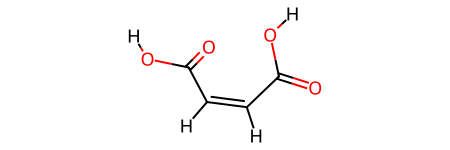

In [3]:
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol

# generate Molecule
mol = smiles_to_3d_mol(
    mol_smiles,
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol)

In [4]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol

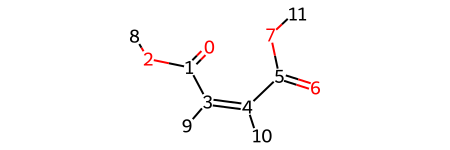

In [5]:
show_atom_number(mol, "atomLabel")

In [6]:
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol

# get data element of this molecule
data = get_chiro_data_from_mol(mol)
display(data)

Data(x=[12, 52], edge_index=[2, 22], edge_attr=[22, 14], pos=[12, 3], bond_distances=[11], bond_distance_index=[2, 11], bond_angles=[14], bond_angle_index=[3, 14], dihedral_angles=[16], dihedral_angle_index=[4, 16])

In [7]:
from ptgnn.transform.edge_graph.permutation_tree_selective import custom_to_edge_graph

# transform to edge graph using custom function
edge_graph, node_mapping = custom_to_edge_graph(
    data=data,
)
display(edge_graph, node_mapping)

Data(x=[22, 118], edge_index=[2, 50], edge_attr=[50, 80], pos=[22, 6], parallel_node_index=[22], circle_index=[22])

{(0, 1): 0,
 (1, 0): 1,
 (1, 2): 2,
 (2, 1): 3,
 (1, 3): 4,
 (3, 1): 5,
 (2, 8): 6,
 (8, 2): 7,
 (3, 4): 8,
 (4, 3): 9,
 (3, 9): 10,
 (9, 3): 11,
 (4, 5): 12,
 (5, 4): 13,
 (4, 10): 14,
 (10, 4): 15,
 (5, 6): 16,
 (6, 5): 17,
 (5, 7): 18,
 (7, 5): 19,
 (7, 11): 20,
 (11, 7): 21}

In [8]:
# detect double edge (with or without stereobond)
for bond in mol.GetBonds():
    if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
        print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())
        print(bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx())

Bond 0 stereo: STEREONONE
0 1
Bond 3 stereo: STEREOCIS
3 4
Bond 5 stereo: STEREONONE
5 6


In [9]:
bond_start = 3
bond_end = 4

In [10]:
display(node_mapping[(bond_start, bond_end)])
display(node_mapping[(bond_end, bond_start)])

8

9

In [11]:
import torch
# get neighbors
neighbors = data.edge_index[1, data.edge_index[0]==3]
neighbors = neighbors[neighbors != 4]

neighbors = torch.cat([neighbors, data.edge_index[1, data.edge_index[0]==4]])
neighbors = neighbors[neighbors != 3].sort().values
neighbors
display(neighbors)

tensor([ 1,  5,  9, 10])

In [12]:
assert len(neighbors) == 4

In [13]:
pos = data.pos[neighbors]
display(pos)

tensor([[-1.2816,  0.2306, -0.5107],
        [ 1.6822, -0.0627,  0.2656],
        [-1.3551, -1.6898,  0.5270],
        [ 0.9359, -2.0202,  0.8934]])

In [14]:
distances = torch.zeros(4,4)
for i in range(4):
    for j in range(4):
        distances[i,j] = ((pos[i] - pos[j]) ** 2).sum().sqrt()
display(distances)

tensor([[0.0000, 3.0778, 2.1840, 3.4576],
        [3.0778, 0.0000, 3.4556, 2.1869],
        [2.1840, 3.4556, 0.0000, 2.3435],
        [3.4576, 2.1869, 2.3435, 0.0000]])

In [15]:
def calc_order(distances):
    order = [0]
    while len(distances):
        rel_order = distances[order[-1]].argsort()
        for i in range(4):
            if not rel_order[i] in order:
                order.append(int(rel_order[i]))
                break
        else:
            return torch.tensor(order)

In [16]:
order = calc_order(distances)
display(order)

tensor([0, 2, 3, 1])

In [17]:
# get elements
neighbor_order = neighbors[order]
display(neighbor_order)

tensor([ 1,  9, 10,  5])

## trans molecule

In [18]:
# define cis/trans molecule
mol_smiles = "OC(=O)/C=C/C(=O)O"

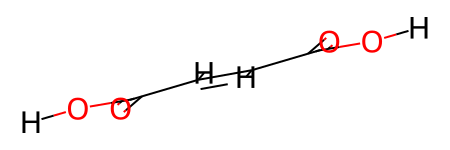

In [19]:
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol

# generate Molecule
mol = smiles_to_3d_mol(
    mol_smiles,
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol)

In [20]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol

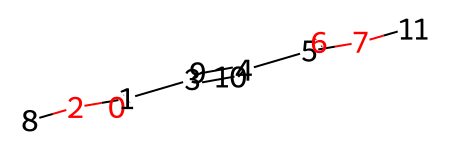

In [21]:
show_atom_number(mol, "atomLabel")

In [22]:
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol

# get data element of this molecule
data = get_chiro_data_from_mol(mol)
display(data)

Data(x=[12, 52], edge_index=[2, 22], edge_attr=[22, 14], pos=[12, 3], bond_distances=[11], bond_distance_index=[2, 11], bond_angles=[14], bond_angle_index=[3, 14], dihedral_angles=[16], dihedral_angle_index=[4, 16])

In [23]:
from ptgnn.transform.edge_graph.permutation_tree_selective import custom_to_edge_graph

# transform to edge graph using custom function
edge_graph, node_mapping = custom_to_edge_graph(
    data=data,
)
display(edge_graph, node_mapping)

Data(x=[22, 118], edge_index=[2, 50], edge_attr=[50, 80], pos=[22, 6], parallel_node_index=[22], circle_index=[22])

{(0, 1): 0,
 (1, 0): 1,
 (1, 2): 2,
 (2, 1): 3,
 (1, 3): 4,
 (3, 1): 5,
 (2, 8): 6,
 (8, 2): 7,
 (3, 4): 8,
 (4, 3): 9,
 (3, 9): 10,
 (9, 3): 11,
 (4, 5): 12,
 (5, 4): 13,
 (4, 10): 14,
 (10, 4): 15,
 (5, 6): 16,
 (6, 5): 17,
 (5, 7): 18,
 (7, 5): 19,
 (7, 11): 20,
 (11, 7): 21}

In [24]:
# detect double edge (with or without stereobond)
for bond in mol.GetBonds():
    if bond.GetBondType() == Chem.rdchem.BondType.DOUBLE:
        print("Bond", bond.GetIdx(), "stereo:", bond.GetStereo())
        print(bond.GetBeginAtom().GetIdx(), bond.GetEndAtom().GetIdx())

Bond 0 stereo: STEREONONE
0 1
Bond 3 stereo: STEREOTRANS
3 4
Bond 5 stereo: STEREONONE
5 6


In [25]:
bond_start = 3
bond_end = 4

In [26]:
display(node_mapping[(bond_start, bond_end)])
display(node_mapping[(bond_end, bond_start)])

8

9

In [27]:
import torch
# get neighbors
neighbors = data.edge_index[1, data.edge_index[0]==3]
neighbors = neighbors[neighbors != 4]

neighbors = torch.cat([neighbors, data.edge_index[1, data.edge_index[0]==4]])
neighbors = neighbors[neighbors != 3].sort().values
neighbors
display(neighbors)

tensor([ 1,  5,  9, 10])

In [28]:
assert len(neighbors) == 4

In [29]:
pos = data.pos[neighbors]
display(pos)

tensor([[-1.8509, -0.4835, -0.0967],
        [ 1.8509,  0.4835,  0.0967],
        [-0.4121,  0.0421,  1.4753],
        [ 0.4121, -0.0421, -1.4753]])

In [30]:
distances = torch.zeros(4,4)
for i in range(4):
    for j in range(4):
        distances[i,j] = ((pos[i] - pos[j]) ** 2).sum().sqrt()
display(distances)

tensor([[0.0000, 3.8309, 2.1949, 2.6864],
        [3.8309, 0.0000, 2.6864, 2.1949],
        [2.1949, 2.6864, 0.0000, 3.0647],
        [2.6864, 2.1949, 3.0647, 0.0000]])

In [31]:
def calc_order(distances):
    order = [0]
    while len(distances):
        rel_order = distances[order[-1]].argsort()
        for i in range(4):
            if not rel_order[i] in order:
                order.append(int(rel_order[i]))
                break
        else:
            return torch.tensor(order)

In [32]:
order = calc_order(distances)
display(order)

tensor([0, 2, 1, 3])

In [33]:
# get elements
neighbor_order = neighbors[order]
display(neighbor_order)

tensor([ 1,  9,  5, 10])

In [38]:
for i in set([1,2,3]):
    print(i)

1
2
3


# Test as a whole

In [1]:
# define cis/trans molecule
mol_smiles = "OC(=O)/C=C\C(=O)O"

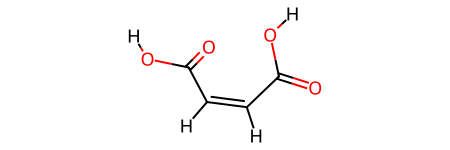

In [2]:
from ptgnn.features.chienn.molecule3d import smiles_to_3d_mol

# generate Molecule
mol = smiles_to_3d_mol(
    mol_smiles,
    max_number_of_attempts=100,
    max_number_of_atoms=100
)
display(mol)

In [3]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()))
    return mol

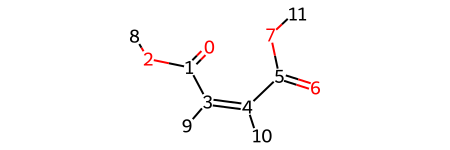

In [4]:
show_atom_number(mol, "atomLabel")

In [5]:
from ptgnn.dataset.utils_chienn import get_chiro_data_from_mol

# get data element of this molecule
data = get_chiro_data_from_mol(mol)
display(data)

Data(x=[12, 52], edge_index=[2, 22], edge_attr=[22, 14], pos=[12, 3], bond_distances=[11], bond_distance_index=[2, 11], bond_angles=[14], bond_angle_index=[3, 14], dihedral_angles=[16], dihedral_angle_index=[4, 16])

In [6]:
from ptgnn.transform.edge_graph import permutation_tree_transformation

transformed_graph = permutation_tree_transformation(
    data=data,
    mol=mol,
    k=3,
    tetrahedral_chiral=True,
    chiral_center_selective=True,
    chiral_center_select_potential=True,
    remove_duplicate_edges=True,
    cis_trans_edges=True,
    cis_trans_edges_select_potential=True,
    create_order_matrix=True
)
display(transformed_graph, transformed_graph.ptree)

Data(x=[11, 118], edge_index=[2, 28], edge_attr=[28, 80], ptree=[11], initial_map=[43], layer0_order_matrix=[1], layer0_type_mask=[1], layer0_pooling=[1], num_layer=3, layer1_order_matrix=[1], layer1_type_mask=[1], layer1_pooling=[1], layer2_order_matrix=[1], layer2_type_mask=[1], layer2_pooling=[1])

['{"S": [0, {"P": [1, 2]}]}',
 '{"S": [1, {"P": [{"P": [0, 2]}, {"P": [3]}]}]}',
 '{"S": [2, {"P": [{"P": [0, 1]}, {"P": [4, 5]}]}]}',
 '{"S": [3, {"P": [1]}]}',
 '{"S": [4, {"C": [2, 5, 7, 6]}]}',
 '{"S": [5, {"P": [2, 4]}]}',
 '{"S": [6, {"P": [{"P": [4, 7]}, {"P": [8, 9]}]}]}',
 '{"S": [7, {"P": [4, 6]}]}',
 '{"S": [8, {"P": [6, 9]}]}',
 '{"S": [9, {"P": [{"P": [6, 8]}, {"P": [10]}]}]}',
 '{"S": [10, {"P": [9]}]}']

In [8]:
{
    key: value
    for key, value in zip([1,2,3], [4,5,6])
}

{1: 4, 2: 5, 3: 6}